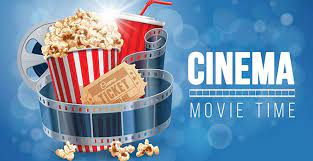

# Project Title

**Authors:** David Spall
***

## Overview

Microsoft is investigating the feasability of a new movie studio and as part of this analysis want to explore the types of films that are doing well at the box office. 

## Business Problem

In order to identify the best type films for Microsoft to produce we need to analyse the characteristics of a successful film for the business. Key indicators of success for business is revenue and return on investment (ROI).

To carry this out we chose to analyse the 10 largest grossing studios to see what genres, run times and ratings drove revenue and ROI.


## Data Understanding

The data used for analysis in this project came from 3 sources:
- Imdb contains genre, run time and ratings data
- The Numbers contains revenue and budget data per movie
- Box office movies contains studio data

The analysis followed the following parameters:
- Top 10 studios by Gross Revenue
- Movies released from 2010 onwards

This decision was taking primarily to have the most current information and to reduce any outlying data from smaller studios.


In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Import IMDB 
imdb_title_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_ratings_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

# Import Box Office Mojo
bom_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

# The Numbers
the_numbers_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')


In [3]:
imdb_title_basics_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [4]:
imdb_ratings_df

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [5]:
bom_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [6]:
bom_gross_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [7]:
the_numbers_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [8]:
the_numbers_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

## Find top 10 studios by Gross Revenue
Joining the BOM and the numbers together to get financial data by studio and then filtering down to the top 10 studios so as to have a list to reference for analysis.

In [9]:
#Creating a function to convert strings to Integers to facilitate calculations
def tidy_nums(column_head):

        the_numbers_df[column_head].replace(',','', regex=True, inplace=True)
        the_numbers_df[column_head] = the_numbers_df[column_head].map(lambda x: 
                                                    int(x.replace('$','')))
        return the_numbers_df   

In [10]:
#Run function
tidy_nums('production_budget')
tidy_nums('domestic_gross')
tidy_nums('worldwide_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [11]:
# Changing to date to facilitate selection of year
the_numbers_df['year'] = pd.DatetimeIndex(the_numbers_df['release_date']).year

In [12]:
#Covert $ to millions for visualisations
the_numbers_df['Budget $M'] = the_numbers_df['production_budget']/1000000
the_numbers_df['Revenue $M'] = the_numbers_df['worldwide_gross']/1000000
the_numbers_df['ROI $M'] = the_numbers_df['Revenue $M'] - the_numbers_df['Budget $M']

In [13]:
# Drop Unecessary Columns
the_numbers_df = the_numbers_df.drop(['id','release_date', 'production_budget', 'domestic_gross', 'worldwide_gross'], axis=1)


In [14]:
# Only looking at current box office figures so we going to take from 2010 onwards
the_numbers_df = the_numbers_df[(the_numbers_df['year'] >= 2010)]
the_numbers_df

,movie,year,Budget $M,Revenue $M,ROI $M
1,Pirates of the Caribbean: On Stranger Tides,2011,410.6000,1045.663875,635.063875
2,Dark Phoenix,2019,350.0000,149.762350,-200.237650
3,Avengers: Age of Ultron,2015,330.6000,1403.013963,1072.413963
4,Star Wars Ep. VIII: The Last Jedi,2017,317.0000,1316.721747,999.721747
5,Star Wars Ep. VII: The Force Awakens,2015,306.0000,2053.311220,1747.311220
...,...,...,...,...,...
5761,Stories of Our Lives,2014,0.0150,0.000000,-0.015000
5771,Family Motocross,2015,0.0100,0.000000,-0.010000
5772,Newlyweds,2012,0.0090,0.004584,-0.004416
5777,Red 11,2018,0.0070,0.000000,-0.007000


In [15]:
#Getting a sample to duplicate names to see if there is a pattern
the_numbers_df['movie'].value_counts().head(5)

Robin Hood    2
Snitch        2
Trance        2
The Square    2
Kynodontas    1
Name: movie, dtype: int64

In [16]:
# Checking duplicates to see if they are remakes. Mulitple years for the movie are a good indication.
duplicates = the_numbers_df.apply(lambda row: row[the_numbers_df['movie'].isin(['Robin Hood', 'Trance', 'The Square', 'Snitch'])])
duplicates = duplicates.sort_values('movie', ascending = True)
duplicates
#Robin hood looks like a remake with the rest having two entries. Only 3 movies out of a data set of 2194 wont skew results

,movie,year,Budget $M,Revenue $M,ROI $M
38,Robin Hood,2010,210.00,322.459006,112.459006
408,Robin Hood,2018,99.00,84.747441,-14.252559
3025,Snitch,2013,15.00,57.907734,42.907734
5351,Snitch,2012,0.85,0.000000,-0.850000
5009,The Square,2010,1.90,0.740932,-1.159068
5099,The Square,2013,1.50,0.176262,-1.323738
2970,Trance,2013,16.00,22.594052,6.594052
5330,Trance,2012,0.95,0.000000,-0.950000


In [17]:
#Joining BOM studio data to The Numbers
return_by_studio = pd.merge(left=the_numbers_df, right=bom_gross_df, how="left", left_on=['movie'], right_on=['title'])
return_by_studio

,movie,year_x,Budget $M,Revenue $M,ROI $M,title,studio,domestic_gross,foreign_gross,year_y
0,Pirates of the Caribbean: On Stranger Tides,2011,410.6000,1045.663875,635.063875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011.0
1,Dark Phoenix,2019,350.0000,149.762350,-200.237650,NaN,NaN,NaN,NaN,NaN
2,Avengers: Age of Ultron,2015,330.6000,1403.013963,1072.413963,Avengers: Age of Ultron,BV,459000000.0,946400000,2015.0
3,Star Wars Ep. VIII: The Last Jedi,2017,317.0000,1316.721747,999.721747,NaN,NaN,NaN,NaN,NaN
4,Star Wars Ep. VII: The Force Awakens,2015,306.0000,2053.311220,1747.311220,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2189,Stories of Our Lives,2014,0.0150,0.000000,-0.015000,NaN,NaN,NaN,NaN,NaN
2190,Family Motocross,2015,0.0100,0.000000,-0.010000,NaN,NaN,NaN,NaN,NaN
2191,Newlyweds,2012,0.0090,0.004584,-0.004416,NaN,NaN,NaN,NaN,NaN
2192,Red 11,2018,0.0070,0.000000,-0.007000,NaN,NaN,NaN,NaN,NaN


In [18]:
# Drop NAs
return_by_studio.dropna(inplace=True)

In [19]:
#Remove excess columns
return_by_studio = return_by_studio.drop(['domestic_gross', 'foreign_gross', 'year_y'], axis=1)

In [20]:
#Group return dataframe by studio to get $ per studio
top10_profit = return_by_studio.groupby(return_by_studio['studio']).sum()
top10_profit

,year_x,Budget $M,Revenue $M,ROI $M
studio,,,,
3D,2010,5.0,16.515203,11.515203
A24,22170,106.5,355.829992,249.329992
ATO,2010,12.5,2.272186,-10.227814
Affirm,4035,7.0,31.471492,24.471492
Amazon,2018,20.0,7.034615,-12.965385
...,...,...,...,...
W/Dim.,16096,192.5,608.851922,416.351922
WB,199365,8125.0,22163.568959,14038.568959
WB (NL),72508,2133.6,8520.176106,6386.576106


In [21]:
#Sort List by highest ROI$
top10_ROI = top10_profit.sort_values('ROI $M', ascending = False).iloc[:10]
top10_ROI

,year_x,Budget $M,Revenue $M,ROI $M
studio,,,,
BV,140978,9426.80000,33262.637282,23835.837282
Uni.,233621,6572.70000,27305.781963,20733.081963
Fox,215470,7614.00000,26422.455030,18808.455030
WB,199365,8125.00000,22163.568959,14038.568959
Sony,146994,5042.50000,17510.994901,12468.494901
Par.,142974,4722.00000,14321.640964,9599.640964
WB (NL),72508,2133.60000,8520.176106,6386.576106
LGF,108737,2002.78765,6841.461823,4838.674173
P/DW,20109,1334.00000,5078.027601,3744.027601


In [22]:
# Resetting the index 
df_list=top10_ROI.reset_index()

In [23]:
# Passing the studios to a list and printing for reference
top10_list = df_list['studio'].tolist()
top10_list

['BV', 'Uni.', 'Fox', 'WB', 'Sony', 'Par.', 'WB (NL)', 'LGF', 'P/DW', 'LG/S']

## Genres by Gross Revenue
Joined the two IMBD databases together to provide a dataframe of non financial data. Matched the financial data from Dataframes created above to calculate the genres with the highest gross revenue.

In [24]:
#Merge Imdb basics with ratings to Link Title with genre and dropping NaNs
imdb_merge = pd.merge(left=imdb_title_basics_df,right=imdb_ratings_df, on='tconst', how='inner')
imdb_merge = imdb_merge.dropna()
imdb_merge

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...,...
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


In [25]:
#Merge Imdb basics with ratings to Link Title with genre and dropping NaNs
imdb_merge = pd.merge(left=imdb_title_basics_df,right=imdb_ratings_df, on='tconst', how='inner')
imdb_merge = imdb_merge.dropna()
imdb_merge

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...,...
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


In [26]:
#Looking at the data there is more one genre category per movie. Using explode to break up genre of a particular movie
imdb_merge['genres'] = imdb_merge['genres'].apply(lambda x: x.split(','))
imdb_merge = imdb_merge.explode('genres')
imdb_merge

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,7.2,43
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,7.2,43
...,...,...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,Drama,8.7,136
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,Family,8.7,136


In [27]:
#Merging with return_bystudio so we can map a movies to a studio and also provide financial data
movie_by_studio = pd.merge(left=imdb_merge,right=return_by_studio, left_on='primary_title', right_on='movie', how='inner')
movie_by_studio

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie,year_x,Budget $M,Revenue $M,ROI $M,title,studio
0,tt0337692,On the Road,On the Road,2012,124.0,Adventure,6.1,37886,On the Road,2013,25.0,9.313302,-15.686698,On the Road,IFC
1,tt0337692,On the Road,On the Road,2012,124.0,Drama,6.1,37886,On the Road,2013,25.0,9.313302,-15.686698,On the Road,IFC
2,tt0337692,On the Road,On the Road,2012,124.0,Romance,6.1,37886,On the Road,2013,25.0,9.313302,-15.686698,On the Road,IFC
3,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,On the Road,2013,25.0,9.313302,-15.686698,On the Road,IFC
4,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,On the Road,2013,25.0,9.313302,-15.686698,On the Road,IFC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,tt7401588,Instant Family,Instant Family,2018,118.0,Comedy,7.4,46728,Instant Family,2018,48.0,119.736188,71.736188,Instant Family,Par.
2915,tt7401588,Instant Family,Instant Family,2018,118.0,Drama,7.4,46728,Instant Family,2018,48.0,119.736188,71.736188,Instant Family,Par.
2916,tt7784604,Hereditary,Hereditary,2018,127.0,Drama,7.3,151571,Hereditary,2018,10.0,70.133905,60.133905,Hereditary,A24
2917,tt7784604,Hereditary,Hereditary,2018,127.0,Horror,7.3,151571,Hereditary,2018,10.0,70.133905,60.133905,Hereditary,A24


In [28]:
# Filter to top ten studios
movie_by_studio = movie_by_studio[movie_by_studio['studio'].isin(top10_list)]

In [29]:
#Removing unecessary columns
movie_by_studio = movie_by_studio.drop(['tconst','original_title', 'movie', 'year_x', 'start_year', 'numvotes', 'year_x'], axis=1)

In [30]:
# Get the Revenue by Genre
return_by_genre = movie_by_studio.groupby(movie_by_studio['genres']).sum()
return_by_genre= return_by_genre.sort_values('ROI $M', ascending = False).iloc[:10]
return_by_genre

,runtime_minutes,averagerating,Budget $M,Revenue $M,ROI $M
genres,,,,,
Adventure,27318.0,1580.5,30758.80000,105443.425859,74684.625859
Action,30814.0,1722.3,28160.20000,90040.864953,61880.664953
Comedy,28352.0,1727.4,16341.20000,59049.735535,42708.535535
Sci-Fi,9536.0,523.2,9836.80000,38077.845112,28241.045112
Drama,30554.0,1761.6,12994.48765,39871.832584,26877.344934
Animation,7313.0,515.8,8614.50000,35105.574914,26491.074914
Thriller,13575.0,776.1,6704.07530,25979.503405,19275.428105
Fantasy,7101.0,385.7,7390.00000,21240.199943,13850.199943
Crime,10504.0,600.2,4710.50000,14659.193795,9948.693795


In [31]:
#Set up a new dataframe with a reset index to enable a bar chart
return_by_genre_graphs=return_by_genre.reset_index()

## Average ROI v Average Budget
Group up the average financial data per movie.

In [32]:
#Group by studio to get the average budget, revenue and calculate ROI
average_by_genre = movie_by_studio.groupby(movie_by_studio['genres']).mean()
average_by_genre['ROI%'] = (average_by_genre['ROI $M']/average_by_genre['Revenue $M'])*100


In [33]:
#Select the top 10 genres
average_by_genre = average_by_genre.sort_values('Revenue $M', ascending = False).iloc[:10]

In [34]:
#Setting up DF to graph
average_by_genre_graphs=average_by_genre.reset_index()

## Leading Studios by Run Time
Providing a count of the run time for the histogram below

In [35]:
#Access Movie Studio to get run times and reverse the multiple entries from the explode
runtime_analysis = movie_by_studio.drop_duplicates(subset='primary_title', keep="last")

In [36]:
#Setting up dataframe for a graph
run_time_analysis_graph = runtime_analysis.reset_index()

In [37]:
#Calculating ROI% per movie for Run Time
movie_by_studio['ROI%'] = (movie_by_studio['ROI $M']/movie_by_studio['Revenue $M'])*100

## Rating Analysis
Dropping duplicates from the earlier dataframe to analyse the ratings for those titles greater than 75%

In [38]:
#Bringing Movie by Studio into a new DF and dropping duplicates
rating_analysis = movie_by_studio.drop_duplicates(subset='primary_title', keep="last")

In [39]:
#Only want to look at ROI for movies greater than 75%
rating_analysis = rating_analysis.loc[(rating_analysis['ROI%'] >= 75)]

In [40]:
#Setting up a dataframe for graph
rating_analysis_graph=rating_analysis.reset_index()

## Genres by Gross Revenue Graph
This data was chosen to support the indentification of the most popular type of movies using gross revenue as the main indicator. 

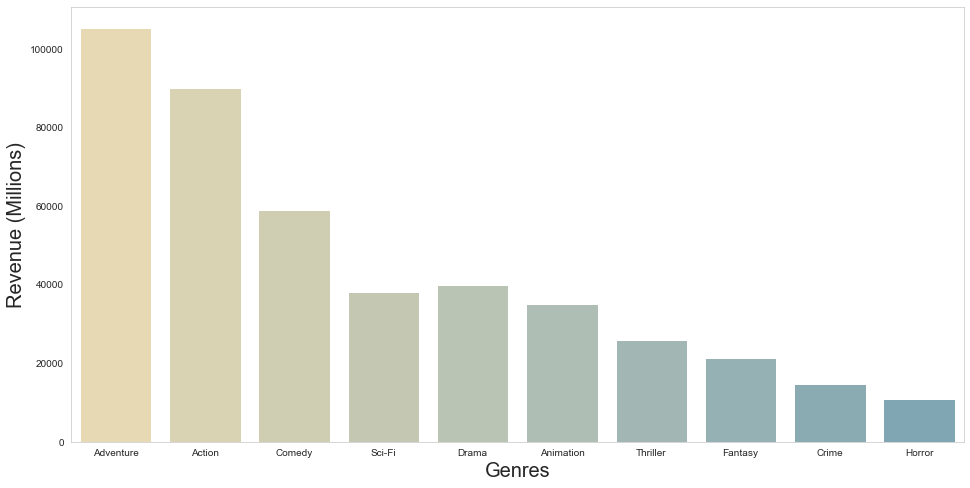

In [41]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize = (16,8))
a= sns.barplot(data=return_by_genre_graphs, x='genres',y= 'Revenue $M', palette="blend:#EDA,#7AB")
plt.xlabel('Genres', size=20)
plt.ylabel('Revenue (Millions)', size=20);          



## Average ROI v Average Budget Scatterplot
The data chosen around this was based on a ROI calcultion and is used to highlight the recommendation around categories of movie outside those that are the top earning that would support a higher ROI. It is based on the averages per movie for the top 10 studios. 

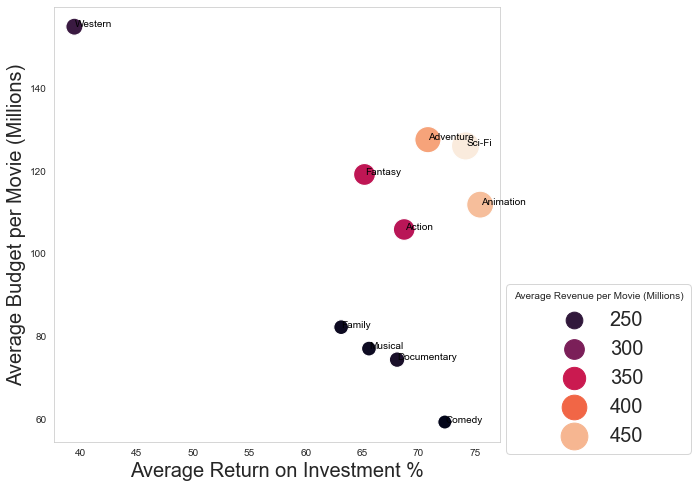

In [42]:
#plot scatter plot: ROI by Production Budget
plt.figure(figsize = (8,8))
p= sns.scatterplot(data=average_by_genre_graphs,
                x='ROI%',
                y='Budget $M', 
                size='Revenue $M',
                sizes=(200, 800), hue= 'Revenue $M', palette="rocket")
plt.legend(title='Average Revenue per Movie (Millions)', bbox_to_anchor=(1.45, -0.05), loc="lower right", frameon=True, fontsize =20)
plt.xlabel("Average Return on Investment %", size=20)
plt.ylabel('Average Budget per Movie (Millions)', size=20)
#sns.set(font_scale =1.15)
plt.rcParams["axes.labelsize"] = 20
for i, txt in enumerate(average_by_genre_graphs['genres']):
    plt.annotate(txt,(average_by_genre_graphs['ROI%'][i]+.04, average_by_genre_graphs['Budget $M'][i]-.06), size='medium', color='black',annotation_clip = False)
    

## Runtime Analysis Histogram
This a count of run times for the top 10 studios to support the recommendation around optimal movie run length.

Text(0, 0.5, 'No of Movies')

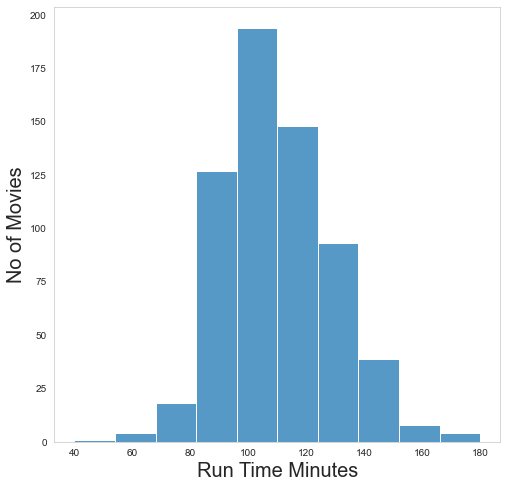

In [43]:
plt.figure(figsize = (8,8))
sns.histplot(data=run_time_analysis_graph, x="runtime_minutes", bins=10)
plt.xlabel("Run Time Minutes", size=20)
plt.ylabel('No of Movies', size=20)



## ROI v Rating
Compares ratings from IMDB to ROI to assess the relationship between ROI and rating. 

Text(0, 0.5, 'Average Moving Rating')

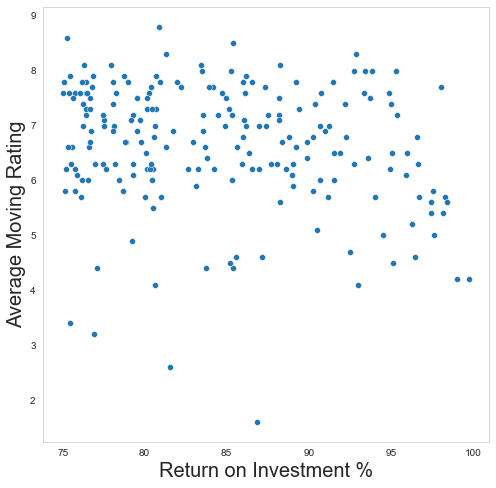

In [44]:
plt.figure(figsize = (8,8))
sns.scatterplot(data=rating_analysis_graph, x="ROI%", y="averagerating")
plt.xlabel("Return on Investment %", size=20)
plt.ylabel('Average Moving Rating', size=20)


## Evaluation
The analysis indentifies the ROI per movie within the leading categories that will drive good returns while maintaining a high level of gross revenue.

As per the ROI v Rating comparison further anlaysis could be undertaken to see which directors and producers drive high ratings so they could be targeted to lead projects in the future. 


## Conclusions
To pursue a strategy of both high revenue and ROI movies Microsoft should concentrate on the Animation, Sci-Fi and Comedy genres.              

For the Animation and Sci-Fi genres production budgets should be between 110M and 130M. Movies in the Comedy could be produced at around 60M

Run time should be between 90-100 Minutes

Further analysis should be undertaken on the directors and actors that drive ratings as this can have a positive impact on movie ROI.
